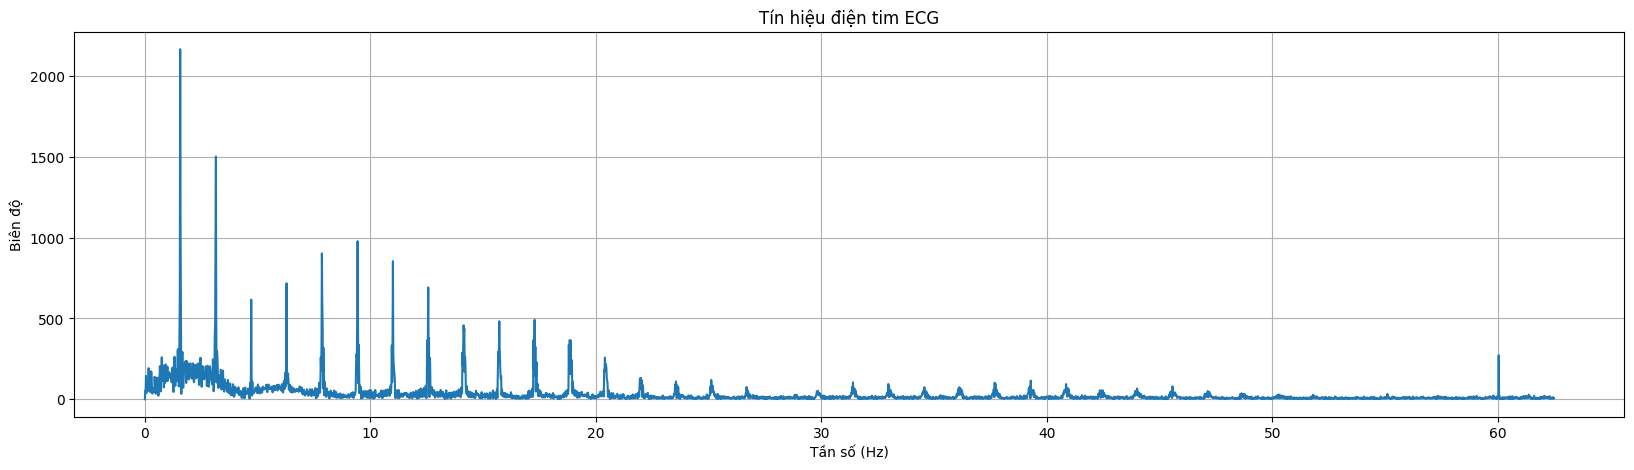

Tần số nhịp tim: 1.57 Hz
Nhịp tim: 94.00 BPM


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Đọc dữ liệu từ file Excel
data = pd.read_excel("ECG_data.xlsx", header=None)
ecq_signal = data.iloc[0].values

# Thông số tín hiệu
Fs = 125  # Tần số lấy mẫu (Hz)
N = len(ecq_signal)  # Số mẫu thời gian
Ts = 1 / Fs  # Khoảng thời gian giữa các mẫu

# Biến đổi Fourier nhanh
frequencies = np.fft.fftfreq(N, Ts)  # Tạo trục tần số
fft_values = np.abs(fft(ecq_signal))  # Lấy biên độ phổ

# Chỉ xét tần số dương
positive_freqs = frequencies[:N // 2]
positive_fft = fft_values[:N // 2]

# Xác định đỉnh phổ trong khoảng tần số dưới 4 Hz
valid_indices = np.where(positive_freqs < 4)[0]
peak_index = valid_indices[np.argmax(positive_fft[valid_indices])]
peak_freq = positive_freqs[peak_index]

# Vẽ phổ tín hiệu
plt.figure(figsize=(20, 5))
plt.plot(positive_freqs, positive_fft)
plt.xlabel("Tần số (Hz)")
plt.ylabel("Biên độ")
plt.title("Tín hiệu điện tim ECG")
plt.grid()
plt.show()

# Tính nhịp tim (BPM)
heart_rate = peak_freq * 60

print(f"Tần số nhịp tim: {peak_freq:.2f} Hz")
print(f"Nhịp tim: {heart_rate:.2f} BPM")